# Прикладная статистика. ДЗ 4.
# Академия Аналитиков Авито


__Правила:__
- Бонусные баллы даются за задачи, правильно решенные до **2022-01-09 23:59:59**. 
- Финальный дедлайн: **2022-01-23 23:59:59**. 
- После того как ваше решение проверят и ответят, дается неделя на исправление решения (если есть что исправлять). Ответ и обсуждение решения — в телеграме.

- Выполненную работу нужно отправить в чатик HW4-<ваше имя> через бота @AAA_stats22_bot или в личные сообщения боту.
- В качестве решения нужно отправить файл ipynb. Ссылка на интернет-ресурсы не принимается. Не публикуйте решения в открытом доступе!
- Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. **При этом можно добавлять новые ячейки!**
- в ячейках с комментарием `#Автопроверка` нужно заполнить содержимое функций и классов (если есть), которые будут уже объявлены в этой ячейке. При этом:
    - Нельзя убирать или переставять `#Автопроверка` в ячейке. 
    - Нельзя менять сигнатуру и возвращаемое значение функций. То есть добавлять любой код можно, но удалять, что уже написано - нельзя.
    - Нельзя ничего импортировать в таких ячейках. Все доступные для использования библиотеки будут указаны заранее. Такие слова, как `import`, `globals`, `locals`, `eval`, `exec` также нельзя использовать внутри ячеек.
    - Нельзя использовать библиотеки, кроме тех, что указаны в задании. Ваш код должен работать именно с эти набором библиотек без любого дополнительного импорта!
    - Нельзя использовать код из других ячеек ноутбука (кроме ячейки с импортом, в которой указаны все доступные библиотеки). Единственное исключение - если вы проставите в начало такой ячейки слово `#Автопроверка`. Тогда вы можете использовать код из этой ячейки.
    - В случае нарушения этого правила автопроверка будет провалена и вы не получите часть баллов за задачу. 
    - В случае, если есть несколько ячеек автопроверки, то в каждой такой ячейке можно использовать созданные вами функции (или классы) из других ячеек автопроверки.

## Задача 1 (2 балла)

Пусть нам нужно оценить $\mu$ — матожидание некой случайной величины, и у нас
есть выборка из нее размером 1000. С помощью бутстрапа соберем 1000 бутстрап-выборок, для каждой посчитаем среднее, получим 1000 средних. Это выборка из
1000 объектов, к ней можно применить критерий Стьюдента. Применим, построим
доверительный интервал для 𝜇.

Почему так делать нельзя?

Давайте снова пройдёмся по алгоритму Бутстрапа:

1. По выборке мы строим эмпирическую с.в. ($\hat{\xi}$).
2. Мы генерируем выборки из него (бутстрап-выборки).
3. Считаем статистику для каждой выборки.
4. Мы получили распределение статистики, которое, как утверждает Бутстрап-метод, будет "моделировать" распределение статистики для с.в.. $ \\ $ 
В итоге, если строить доверительный интервал для $\mu$, как $(\overline{X}_B + SEM_B * \text{ bootstrap_distribution_p975}, \overline{X}_B + SEM_B * \text{ bootstrap_distribution_p025})$, где $\overline{X}_B, SEM_B$ - выборочные оценки, которые построены по бутстрап-выборкам, а bootstrap_distribution_px - x - процентиль из распределения бутстрап-выборок. Мы получаем доверительный интервал не для $\mu$, а для $\overline{X}$ (т.к. строя распределение бутстрап-выборок, мы предполагаем, что эмпирическая с.в. - это на самом деле истинная с.в., что не правда, хотя по УЗБЧ, ЗБЧ при n -> $\infty$ она равна (сходится к) истинной с.в.). Получается своего рода оценка оценки, что вообще увеличит погрешность, и, вполне вероятно, истинное значение $\mu$ даже не будет лежать в DI. Правильнее было сделать $(\overline{X}+ SEM * \text{ bootstrap_distribution_p975}, \overline{X} + SEM * \text{ bootstrap_distribution_p025})$

## Задача 2 (6 баллов)

Пусть у вас выборка из неизвестного распределения (но все элементы больше 0) и вы хотите проверить гипотезу:
$$
\begin{align}
&H_0: E \left[exp \left({\dfrac{median(X)}{\overline{X}}} \right) \right] = \theta_0\ vs.\\
&H_1: E \left[exp \left(\dfrac{median(X)}{\overline{X}}\right) \right] \neq \theta_0
\end{align}
$$
* черточка означает среднее по выборке.

С помощью бутстрапа постройте критерий уровня значимости $\alpha$ для проверки этой гипотезы.

Для этого вам надо:
- Показать, в каких случаях вы отвергаете $H_0$
- Как посчитать p-value.

Для начала теоретически поясните ваш алгоритм действий.

## Обоснование: 
1. Считаем статистику $\theta$ = $exp \left({\dfrac{median(X)}{\overline{X}}} \right)$ --(кладём в)--> estimate_statistic
2. Так как нам нужно аппроксимировать p-value, а это $P(S \geq s| H_0)$, где s := mean(bootstrap_distribution), S = mean, то необходимо, чтобы распределенеие статистики $\theta$ подчинялось нулевой гипотезе, что в нашем случае вообще не обязательно (у нас не обязательно estimate_statistic == $\theta_0$). Для этого "сдвинем" выборку на s - $\theta_0$ => распределение статистики будет подчиняться $H_0$.
3. Генерируем бутстрап-выборки из $(\hat{\xi})$. Считаем статистики $\theta_{i}^* = \theta(\hat{\xi_{i}})$
4. $(p-value)^* = \frac{\sum_{i=1}^{B} \left[ \theta_{i}^* \leq \text{ } \mu_0 \right]}{B} \text{, где B - количество бустстрап-выборок} \\
\text{Тогда } \\
\begin{equation*}
p-value = \text{min(}2*
 \begin{cases}
   1 - (p-value)^* &\text{, если $(p-value)^* > 0.5$} \\
   (p-value)^* &\text{, если $(p-value)^* <= 0.5$}
 \end{cases}
\end{equation*}\text{, 1)}$

Критическую область (область отвержения $H_0$) тоже легко найти - это ($-\infty$, bootstrap_distribution_p($\frac{\alpha}{2}$)) and (bootstrap_distribution_p(1 - $\frac{\alpha}{2}$), $+\infty$), где bootstrap_distribution_px - это x - процентиль распределения бутстрап-выборок. Ну или когда p-value < $\alpha$


Теперь перйдем к практике:

Какими библиотеками вы можете пользоваться:
```
import numpy as np
from collections import namedtuple
from scipy.stats.binom
from scipy.stats.norm
from scipy.stats.t
from scipy.stats.bernoulli
```

In [1]:
import numpy as np
from collections import namedtuple
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import bernoulli
from scipy.stats import poisson

In [12]:
#Автопроверка

MyStrangeStatResults = namedtuple('MyStrangeStatResults', 
                                  ['is_rejected', 'pvalue'])


def statistic(sample: list):
    return np.exp(np.median(sample, axis=1) / np.mean(sample, axis=1))


def bootstrap_strange_stat_checker(sample: list, mu_0: float, alpha: float = 0.05):
    """
    Параметры:
    - sample: текущая реализация выборки
    - mu_0: значение странной синусной статистики при H_0
    - alpha: уровень значимости критерия.
        
    Возвращает:
    - MyStrangeStatResults с полями:
        - is_rejected: bool
            - отверглась или нет гипотеза H_0 на уровне значимости alpha
        - pvalue: float
    """
    boot_samples_size = 10000
    is_rejected = None
    pvalue = None
    
    bootstrap_distribution = statistic(np.array([
    np.random.choice(a=sample, size=len(sample), replace=True)
        for _ in range(boot_samples_size)
    ])) #генерация бутстрап-выборок и подсчёт статистики для каждого
    
    cdf_m_0 = np.sum(bootstrap_distribution <= mu_0) / len(bootstrap_distribution) 
    
    if cdf_m_0 > 0.5:
        pvalue = 1 - cdf_m_0
    else:
        pvalue = cdf_m_0

    pvalue = min(2*pvalue, 1)

    if pvalue < alpha:
        is_rejected = True
    else:
        is_rejected = False

    return MyStrangeStatResults(is_rejected, pvalue)

In [13]:
import scipy.stats as sps
from tqdm.notebook import tqdm

##### Теперь проверим корректность критерия (FPR) на Exp распределении:

In [14]:
# Этот код на сервере академии должен выполняться не более 10 минут,
# иначе он не пройдет проверку по времени
from statsmodels.stats.proportion import proportion_confint
negative = 0
positive = 0

np.random.seed(100)
for i in tqdm(range(1000)):
    sample = sps.expon(loc=1, scale=1000).rvs(1000)
    is_rejected, pvalue = bootstrap_strange_stat_checker(sample, mu_0=2, alpha=0.05)
    if is_rejected:
        negative += 1
    else:
        positive += 1

l, r = proportion_confint(count=negative, nobs=positive + negative, alpha=0.1, method='wilson')
    
print(f'FPR is {negative / (positive + negative):.3f} ± {(r - l) / 2:.3f}')


FPR is 0.043 ± 0.011


##### Теперь проверим корректность критерия (FPR) на Norm распределении:

In [15]:
# Этот код на сервере академии должен выполняться не более 10 минут,
# иначе он не пройдет проверку по времени
from statsmodels.stats.proportion import proportion_confint
negative = 0
positive = 0

np.random.seed(100)
for i in tqdm(range(1000)):
    sample = sps.norm(loc=120, scale=30).rvs(1000)
    is_rejected, pvalue = bootstrap_strange_stat_checker(sample, mu_0=np.exp(1), alpha=0.05)
    if is_rejected:
        negative += 1
    else:
        positive += 1

l, r = proportion_confint(count=negative, nobs=positive + negative, alpha=0.1, method='wilson')
    
print(f'FPR is {negative / (positive + negative):.3f} ± {(r - l) / 2:.3f}')


FPR is 0.036 ± 0.010


##### Теперь проверим power критерия на Exp распределении:

In [52]:
# Этот код на сервере академии должен выполняться не более 10 минут,
# иначе он не пройдет проверку по времени
from statsmodels.stats.proportion import proportion_confint
negative = 0
positive = 0

np.random.seed(100)
for i in tqdm(range(1000)):
    sample = sps.expon(loc=1, scale=1000).rvs(1000)
    is_rejected, pvalue = bootstrap_strange_stat_checker(sample, mu_0=2.15, alpha=0.05)
    if is_rejected:
        negative += 1
    else:
        positive += 1

l, r = proportion_confint(count=negative, nobs=positive + negative, alpha=0.1, method='wilson')
    
print(f'power is {negative / (positive + negative):.3f} ± {(r - l) / 2:.3f}')


power is 0.867 ± 0.018


##### Теперь проверим power критерия на Norm распределении:

In [53]:
# Этот код на сервере академии должен выполняться не более 10 минут,
# иначе он не пройдет проверку по времени
from statsmodels.stats.proportion import proportion_confint
negative = 0
positive = 0

np.random.seed(100)
for i in tqdm(range(1000)):
    sample = sps.norm(loc=120, scale=30).rvs(1000)
    is_rejected, pvalue = bootstrap_strange_stat_checker(sample, mu_0=np.exp(1)+0.1, alpha=0.05)
    if is_rejected:
        negative += 1
    else:
        positive += 1

l, r = proportion_confint(count=negative, nobs=positive + negative, alpha=0.1, method='wilson')
    
print(f'power is {negative / (positive + negative):.3f} ± {(r - l) / 2:.3f}')


power is 1.000 ± 0.001


## Задача 3 (3 балла)

Эту задачу стоит решать только после второй задачи из домашки.

Пусть мы подозреваем, что в AB-тесте в тестовой группе увеличилась дисперсия по сравнению с контрольной группой. Сформулировать это предположение на языке статистики и
реализовать его проверку с помощью бутстрапа.

**Теория**:
В качестве статистики рассмотрим $T = \dfrac{s_{test}}{s_{control}} \text{, где } s_{test}, s_{control} \text{ - выброчные оценки на дисперсию.} \\ $ Тогда гипотеза записывается в следующем виде:

$$
\begin{align}
&H_0:  \left({\dfrac{s_{test}}{s_{control}}} \right)  = 1\ vs.\\
&H_1:  \left(\dfrac{s_{test}}{s_{control}}\right)  > 1
\end{align}
$$
Тогда оценим p-value с помощью бутстрап-метода, и если p-value < $\alpha$, то отклоним $H_0$. Ну или другими словами, если значение статистики попадёт в критическую область, которую мы смоделируем с помощью бутстрап-метода.


Теперь перйдем к практике:

Какими библиотеками вы можете пользоваться:
```
import numpy as np
from collections import namedtuple
from scipy.stats.binom
from scipy.stats.norm
from scipy.stats.t
from scipy.stats.bernoulli
```

In [19]:
import numpy as np
from collections import namedtuple
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import bernoulli

In [49]:
#Автопроверка

CompareVarianceResults = namedtuple('CompareVarianceResults', 
                                  ['is_rejected', 'pvalue'])


def variance_ab_checker(test: list, control: list, alpha: float = 0.05):
    """
    Параметры:
    - control: контрольная группа
    - test: тестовая группа
    - alpha: уровень значимости критерия.
        
    Возвращает:
    - CompareVarianceResults с полями:
        - is_rejected: bool
            - отверглась или нет гипотеза H_0 на уровне значимости alpha
        - pvalue: float
    """
    boot_samples_size = 10000
    is_rejected = None
    pvalue = None
    left_bound = None
    right_bound = None
    
    
    n1 = len(control)
    n2 = len(test)
    
    estimate_statistic = np.std(test, ddof=1) / np.std(control, ddof=1) #значение статистики для выборок
    
    bootstrap_distribution = np.array([(
    np.std(np.random.choice(a=test, size=n2, replace=True), ddof=1) / \
        np.std(np.random.choice(a=control, size=n1, replace=True), ddof=1))
        for _ in range(boot_samples_size)
    ]) #строим бутстрап-выборки из эмпирического распределения и считаем для них статистику.
    
    pvalue = np.sum(bootstrap_distribution >= estimate_statistic) / len(bootstrap_distribution) #оцениваем p-value через бутстрап-метод
    
    if pvalue < alpha:
        is_rejected = True
    else:
        is_rejected = False


    return CompareVarianceResults(is_rejected, pvalue)

In [32]:
import scipy.stats as sps
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

In [54]:
# Этот код на сервере академии должен выполняться не более 10 минут,
# иначе он не пройдет проверку по времени
from statsmodels.stats.proportion import proportion_confint
negative = 0
positive = 0
scale = 200

for i in tqdm(range(1000)):
    test = sps.expon(loc=1, scale=1000).rvs(1000)
    control = sps.expon(loc=1, scale=1000).rvs(1000)
    #test = control + scale
    is_rejected, pvalue = variance_ab_checker(test, control, alpha=0.05)
    #print(is_rejected, pvalue)
    if (is_rejected):
        negative += 1
    else:
        positive += 1

l, r = proportion_confint(count=positive, nobs=positive + negative, alpha=0.10, method='wilson')
    
print(f'FPR is {negative / (positive + negative):.3f} ± {(r - l) / 2:.3f}')


FPR is 0.047 ± 0.011


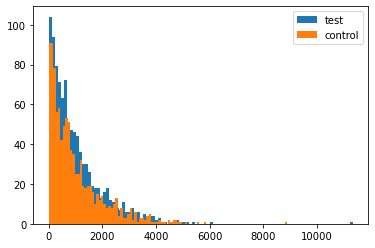

In [70]:
import matplotlib.pyplot as plt
test = sps.expon(loc=1, scale=1000).rvs(10000)
control = sps.expon(loc=1, scale=1000).rvs(1000)
plt.hist(test, label='test', bins=100)
plt.hist(control, label='control', bins=100)
plt.legend()
plt.show()